## Creating a Recurrent Neural Network Model

In [35]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

In [36]:
import tensorflow as tf
from tensorflow import keras

In [37]:
df = pd.read_csv('Tesla_stocks.csv', parse_dates = ['Date'])

In [38]:
df.head()

,Date,Open,High,Low,Close,Volume,Adj Close
0,2010-06-29,19.000000,25.00,17.540001,23.889999,18766300,23.889999
1,2010-06-30,25.790001,30.42,23.299999,23.830000,17187100,23.830000
2,2010-07-01,25.000000,25.92,20.270000,21.959999,8218800,21.959999
3,2010-07-02,23.000000,23.10,18.709999,19.200001,5139800,19.200001
4,2010-07-06,20.000000,20.00,15.830000,16.110001,6866900,16.110001


In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1692 entries, 0 to 1691
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       1692 non-null   datetime64[ns]
 1   Open       1692 non-null   float64       
 2   High       1692 non-null   float64       
 3   Low        1692 non-null   float64       
 4   Close      1692 non-null   float64       
 5   Volume     1692 non-null   int64         
 6   Adj Close  1692 non-null   float64       
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 92.7 KB


In [40]:
train_length = round(len(df)*0.7)
lg = len(df)
val_length = lg-train_length

print('Total observations:',lg)
print('Training set:', train_length)
print('Validation set:', val_length)

Total observations: 1692
Training set: 1184
Validation set: 508


In [41]:
train_data = df['Open'][:train_length,]
val_data = df['Open'][train_length:,]

In [42]:
val_data

1184    188.949997
1185    192.000000
1186    195.429993
1187    194.960007
1188    202.000000
           ...    
1687    244.820007
1688    246.110001
1689    257.000000
1690    262.399994
1691    264.000000
Name: Open, Length: 508, dtype: float64

In [43]:
train_data

0        19.000000
1        25.790001
2        25.000000
3        23.000000
4        20.000000
           ...    
1179    199.210007
1180    194.389999
1181    188.460007
1182    191.149994
1183    193.750000
Name: Open, Length: 1184, dtype: float64

In [44]:
train=train_data.values.reshape(-1,1)
train

array([[ 19.      ],
       [ 25.790001],
       [ 25.      ],
       ...,
       [188.460007],
       [191.149994],
       [193.75    ]])

In [45]:
# Normalization
# Scale the data between the range [0,1]

scaler = MinMaxScaler()
scaled_trainset = scaler.fit_transform(train)

In [46]:
scaled_trainset

array([[0.01053291],
       [0.03553936],
       [0.03262991],
       ...,
       [0.634626  ],
       [0.64453278],
       [0.65410817]])

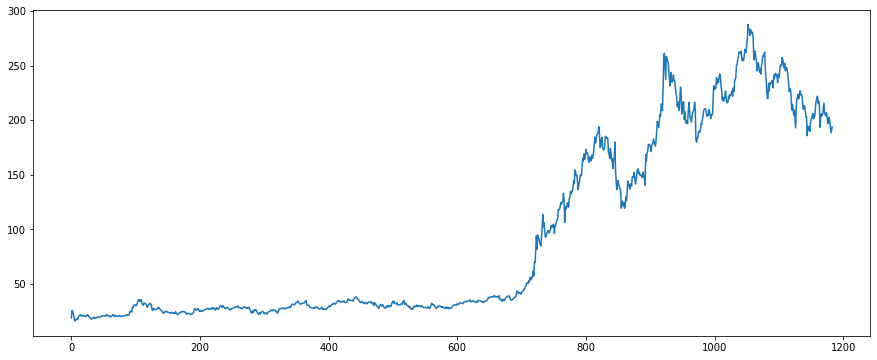

In [47]:
plt.subplots(figsize = (15,6))
plt.plot(train)
plt.show()

### For this model the first 50 values will be taken as the x values and 51st value will be used as the y value in the training data

In [48]:
x_train = []
y_train = []
step = 50

for i in range(step, train_length):
    x_train.append(scaled_trainset[i-step:i,0])
    y_train.append(scaled_trainset[i,0])

In [49]:
X_train, y_train = np.array(x_train), np.array(y_train)

In [50]:
print(X_train.shape)
print(y_train.shape)

(1134, 50)
(1134,)


In [51]:
X_train = np.reshape(X_train, (X_train.shape[0],X_train.shape[1],1))
y_train.reshape(y_train.shape[0],1)

array([[0.01789858],
       [0.01697787],
       [0.01749346],
       ...,
       [0.634626  ],
       [0.64453278],
       [0.65410817]])

In [52]:
print(X_train.shape)
print(y_train.shape)

(1134, 50, 1)
(1134,)


In [53]:
X_train[0].shape

(50, 1)

In [54]:
y_train[0]

0.017898577503111683

In [55]:
# RNN model
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import SimpleRNN
from keras.layers import Dropout

In [56]:
model = Sequential()

model.add(
    SimpleRNN(units = 50,return_sequences= True,input_shape = (X_train.shape[1],1)))

model.add(
    Dropout(0.2))

model.add(
    SimpleRNN(units = 50, return_sequences = True)
             )

model.add(
    Dropout(0.2)
             )

model.add(
    SimpleRNN(units = 50, return_sequences = True)
             )

model.add(
    Dropout(0.2)
             )

model.add(
    SimpleRNN(units = 50)
             )

model.add(
    Dropout(0.2)
             )

model.add(
    Dense(units = 1))

In [57]:
model.compile(optimizer = 'adam', loss = 'mean_squared_error', metrics = ['accuracy'])

In [58]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_4 (SimpleRNN)    (None, 50, 50)            2600      
                                                                 
 dropout_4 (Dropout)         (None, 50, 50)            0         
                                                                 
 simple_rnn_5 (SimpleRNN)    (None, 50, 50)            5050      
                                                                 
 dropout_5 (Dropout)         (None, 50, 50)            0         
                                                                 
 simple_rnn_6 (SimpleRNN)    (None, 50, 50)            5050      
                                                                 
 dropout_6 (Dropout)         (None, 50, 50)            0         
                                                                 
 simple_rnn_7 (SimpleRNN)    (None, 50)               

In [59]:
history = model.fit(X_train, y_train, epochs = 50, batch_size =32)

Epoch 1/50
36/36 [==============================] - 8s 34ms/step - loss: 0.3443 - accuracy: 8.8183e-04
Epoch 2/50
36/36 [==============================] - 1s 33ms/step - loss: 0.2074 - accuracy: 0.0000e+00
Epoch 3/50
36/36 [==============================] - 1s 35ms/step - loss: 0.1268 - accuracy: 8.8183e-04
Epoch 4/50
36/36 [==============================] - 1s 37ms/step - loss: 0.0878 - accuracy: 8.8183e-04
Epoch 5/50
36/36 [==============================] - 2s 43ms/step - loss: 0.0675 - accuracy: 8.8183e-04
Epoch 6/50
36/36 [==============================] - 1s 41ms/step - loss: 0.0515 - accuracy: 0.0000e+00
Epoch 7/50
36/36 [==============================] - 1s 41ms/step - loss: 0.0443 - accuracy: 8.8183e-04
Epoch 8/50
36/36 [==============================] - 2s 43ms/step - loss: 0.0320 - accuracy: 8.8183e-04
Epoch 9/50
36/36 [==============================] - 1s 41ms/step - loss: 0.0296 - accuracy: 8.8183e-04
Epoch 10/50
36/36 [==============================] - 2s 43ms/step - loss:

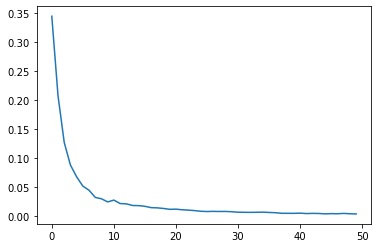

In [60]:
plt.plot(history.history['loss'])

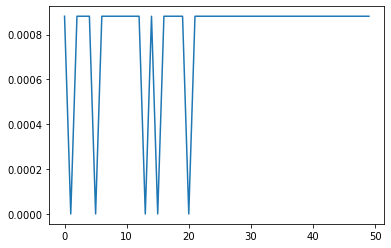

In [61]:
plt.plot(history.history['accuracy'])

In [62]:
y_pred = model.predict(X_train)
y_pred = scaler.inverse_transform(y_pred.reshape(1,-1))

36/36 [==============================] - 2s 12ms/step


In [63]:
y_pred

array([[ 23.744833,  24.458199,  24.795107, ..., 204.87604 , 203.44699 ,
        200.66362 ]], dtype=float32)

In [64]:
y_train

array([0.01789858, 0.01697787, 0.01749346, ..., 0.634626  , 0.64453278,
       0.65410817])

In [65]:
y_train = scaler.inverse_transform(y_train.reshape(1,-1))
y_train

array([[ 21.      ,  20.75    ,  20.889999, ..., 188.460007, 191.149994,
        193.75    ]])

In [66]:
y_train.shape
y_train = np.reshape(y_train, (1134,1))

In [67]:
y_pred.shape
y_pred = np.reshape(y_pred,(1134,1))

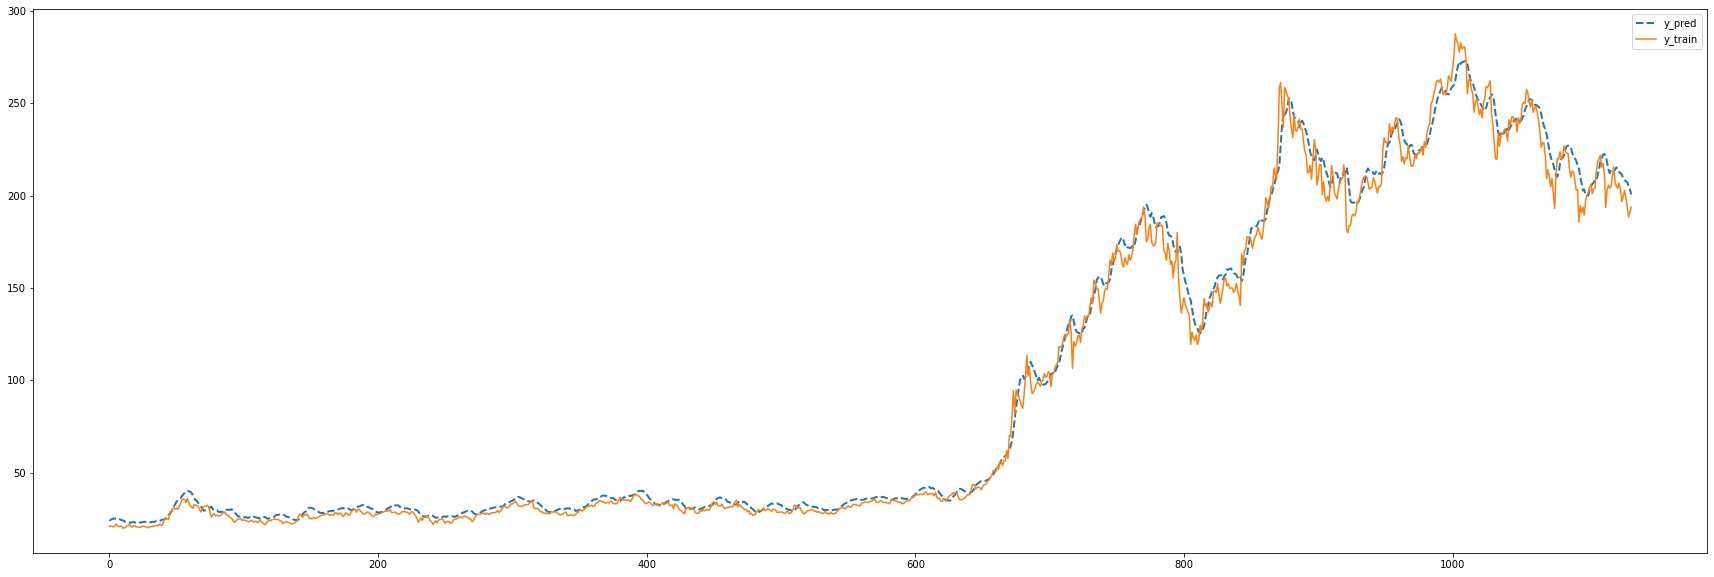

In [68]:
plt.figure(figsize = (30,10))
plt.plot(y_pred, ls = '--', label = 'y_pred', lw = 2)
plt.plot(y_train, label = 'y_train')
plt.legend()
plt.show()

In [84]:
val = val_data.values.reshape(-1,1)
val

array([[188.949997],
       [192.      ],
       [195.429993],
       [194.960007],
       [202.      ],
       [197.449997],
       [198.5     ],
       [201.580002],
       [198.270004],
       [193.919998],
       [189.070007],
       [185.850006],
       [193.529999],
       [188.699997],
       [190.229996],
       [198.      ],
       [202.509995],
       [208.199997],
       [208.429993],
       [209.850006],
       [210.440002],
       [208.570007],
       [207.460007],
       [207.699997],
       [204.990005],
       [206.779999],
       [205.800003],
       [212.5     ],
       [218.270004],
       [220.5     ],
       [222.559998],
       [234.75    ],
       [230.050003],
       [230.389999],
       [229.940002],
       [228.179993],
       [237.759995],
       [234.100006],
       [221.      ],
       [235.990005],
       [236.289993],
       [240.110001],
       [247.610001],
       [244.820007],
       [243.929993],
       [247.      ],
       [248.429993],
       [247.1

In [85]:
scaled_valset = scaler.fit_transform(val)

In [86]:
xval_train = []
yval_train = []
step = 50

for i in range(step, val_length):
    xval_train.append(scaled_valset[i-step:i,0])
    yval_train.append(scaled_valset[i,0])

In [87]:
X_val, y_val = np.array(xval_train), np.array(yval_train)

In [88]:
X_val = np.reshape(X_val, (X_val.shape[0],X_val.shape[1],1))  # reshape to 3D array
y_val = np.reshape(y_val, (-1,1))

In [89]:
y_pred_val = model.predict(X_val)

15/15 [==============================] - 0s 21ms/step


In [90]:
y_pred_val = scaler.inverse_transform(y_pred_val)

In [91]:
y_val_is = scaler.inverse_transform(y_val)

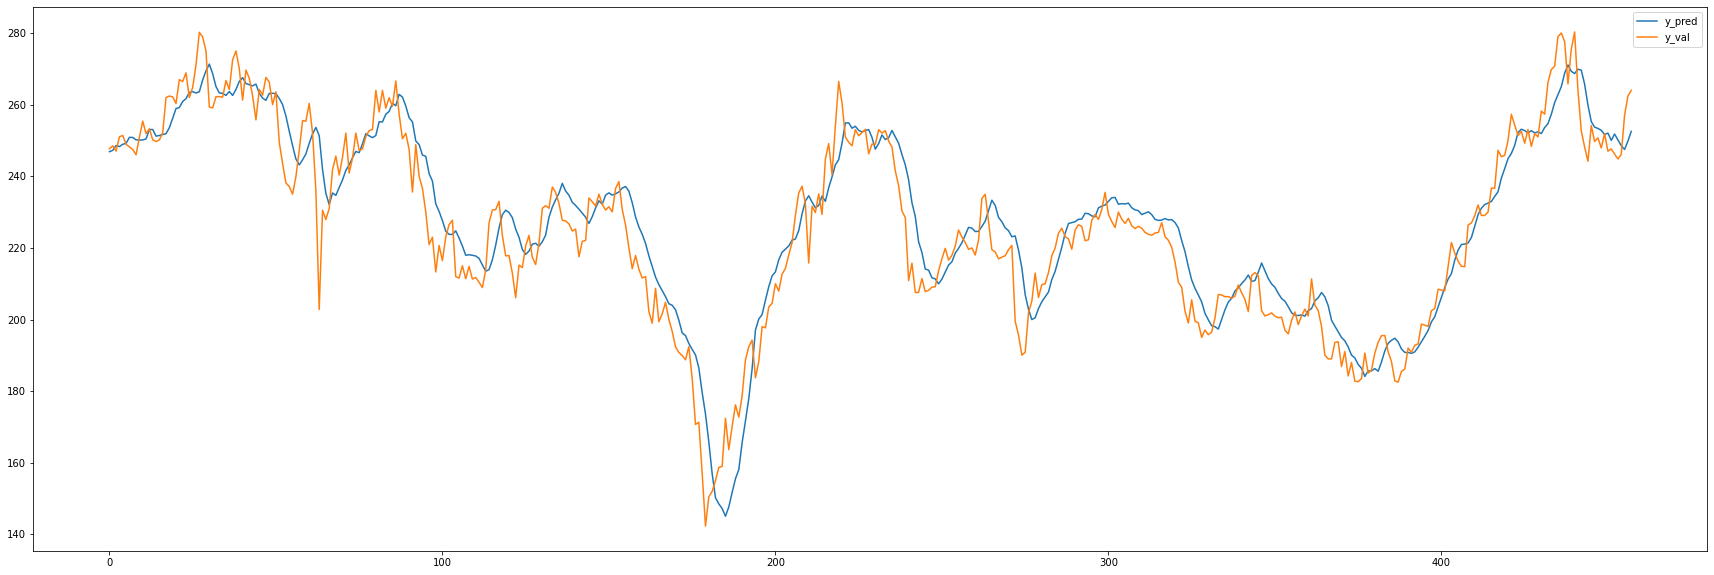

In [92]:
plt.figure(figsize = (30,10))
plt.plot(y_pred_val, label = 'y_pred')
plt.plot(y_val_is, label = 'y_val')
plt.legend()
plt.show()

In [107]:
import tensorflow as tf
import os
from tensorflow.keras.models import load_model

In [108]:
model.save(os.path.join('model', 'SimpleRNN_Forecasting.h5'))
new_model = load_model(os.path.join('model', 'SimpleRNN_Forecasting.h5'))

#### The RNN model is saved in variable new_model.
#### Using new_model we can predict use the model on any data.